#   Thresholding

In [26]:
import cv2

# Load the image in grayscale
img = cv2.imread('attack_on_titan.webp', cv2.IMREAD_GRAYSCALE)

# Set the threshold values
threshold_values = [0, 50, 100, 150, 200]

# Apply thresholding with different threshold values
for threshold_value in threshold_values:
    ret, thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    cv2.imshow(f'Thresholded Image ({threshold_value})', thresh)

# Display the original image
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histogram Processing

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

###  Step# 1: Load moon image
### Step# 2: Rescale intensity values to include all the intensities that fall within the 2nd and 98th percentiles Contrast stretching

In [3]:
img = data.moon()
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

### Step#3: Display the image with its histogram of (step#1)  and (step#2)


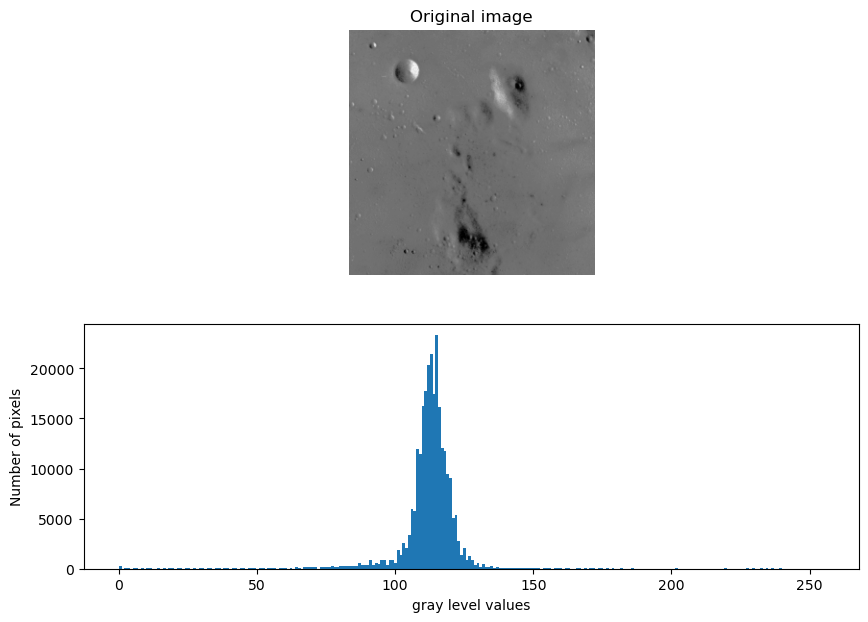

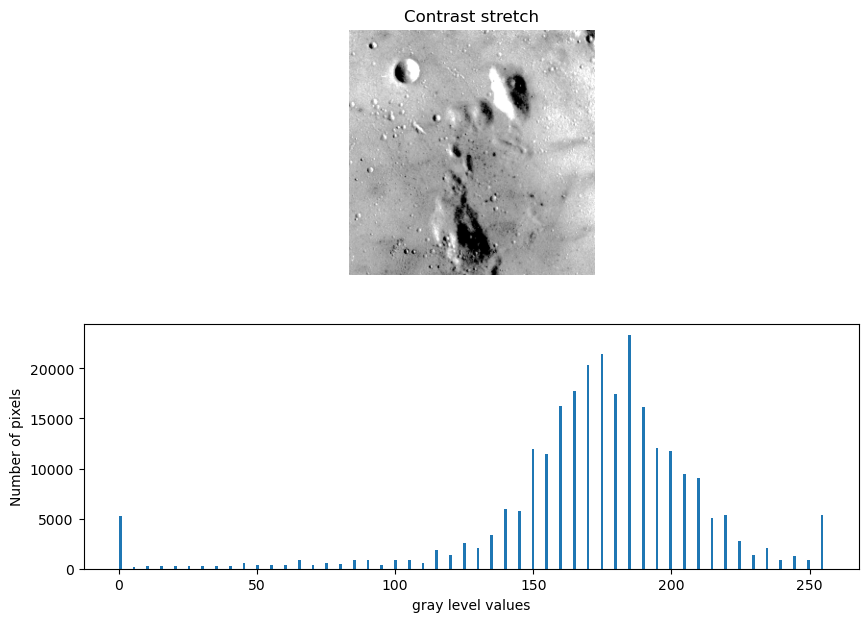

In [6]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
fig.add_subplot(2, 1, 2)
plt.hist(img.flat, bins = 256, range=(0, 255))
plt.xlabel('gray level values')
plt.ylabel('Number of pixels')
plt.show()


fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
plt.imshow(img_rescale, cmap = 'gray')
plt.axis('off')
plt.title('Contrast stretch')
fig.add_subplot(2, 1, 2)
plt.hist(img_rescale.flat, bins = 256, range=(0, 255))
plt.xlabel('gray level values')
plt.ylabel('Number of pixels')
plt.show()

# Task 1: Rescale intensity 

In [8]:
p3, p80 = np.percentile(img, (3, 80))
img_rescale_2 = exposure.rescale_intensity(img, in_range=(p3, p80))

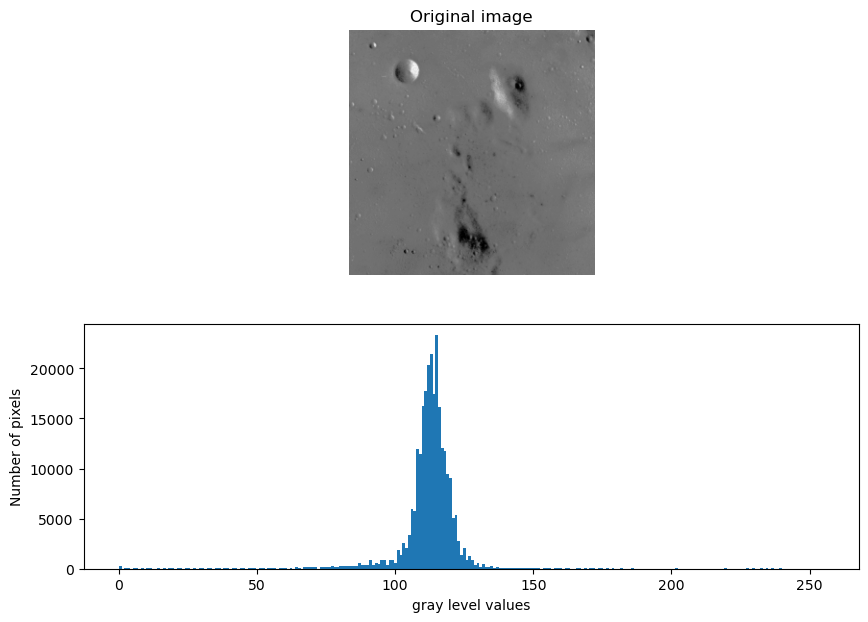

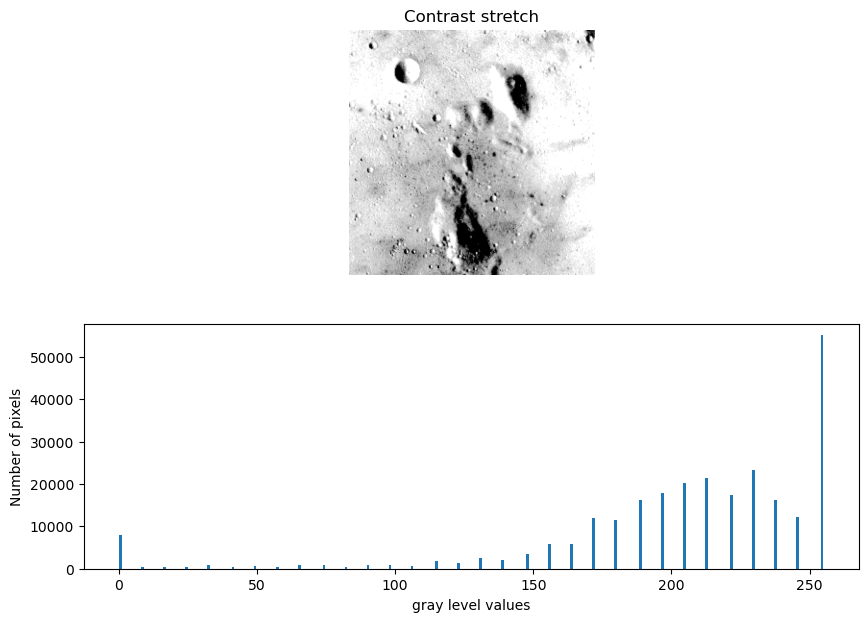

In [10]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
fig.add_subplot(2, 1, 2)
plt.hist(img.flat, bins = 256, range=(0, 255))
plt.xlabel('gray level values')
plt.ylabel('Number of pixels')
plt.show()


fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
plt.imshow(img_rescale_2, cmap = 'gray')
plt.axis('off')
plt.title('Contrast stretch')
fig.add_subplot(2, 1, 2)
plt.hist(img_rescale_2.flat, bins = 256, range=(0, 255))
plt.xlabel('gray level values')
plt.ylabel('Number of pixels')
plt.show()

# Task 2: Histogram Equalization

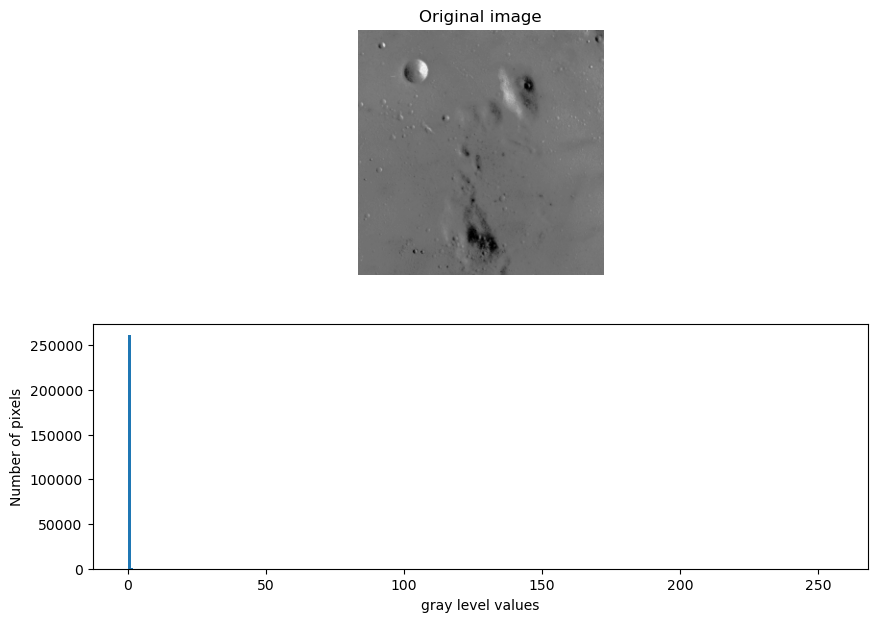

In [14]:
from skimage import data, exposure, img_as_float

# Equalization
img_eq = exposure.equalize_hist(img)

image=exposure.histogram(img_eq, nbins=2)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 1, 1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.title('Original image')
fig.add_subplot(2, 1, 2)
plt.hist(img_eq.flat, bins = 256, range=(0, 255))
plt.xlabel('gray level values')
plt.ylabel('Number of pixels')
plt.show()

# Task 3: Histogram matching

In [20]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

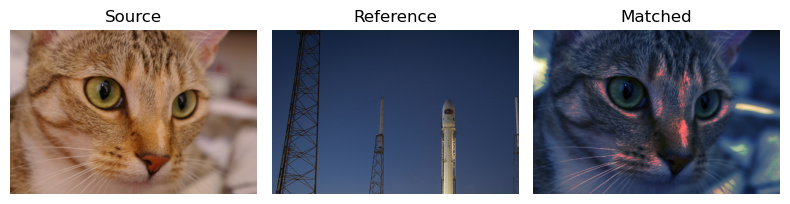

In [22]:
rocket_reference= data.rocket()
cat_img = data.chelsea()

matched = match_histograms(cat_img, rocket_reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(cat_img)
ax1.set_title('Source')
ax2.imshow(rocket_reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

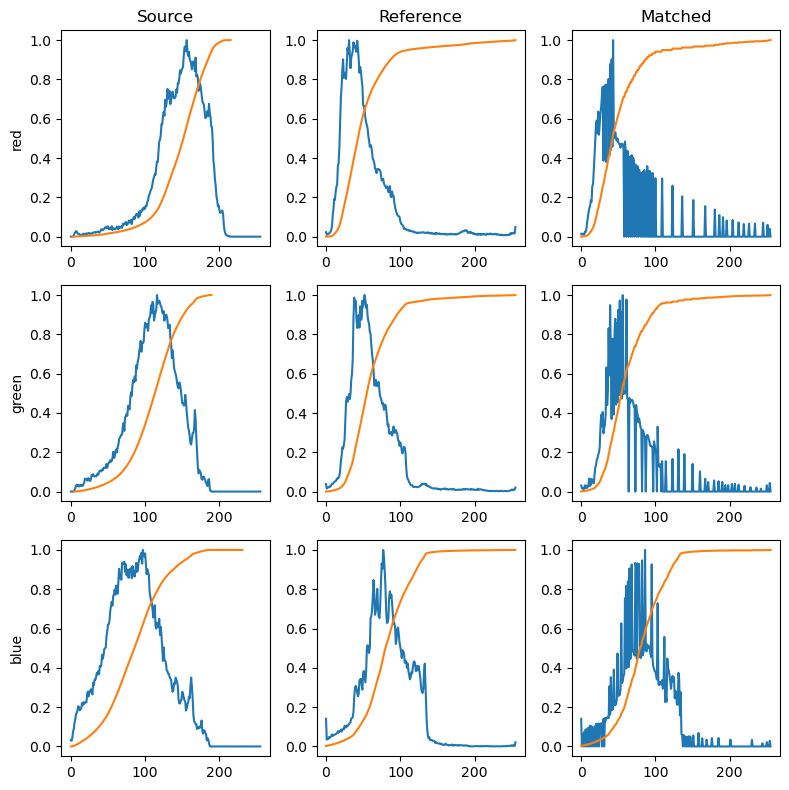

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, img in enumerate((cat_img, rocket_reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()